In [1]:
# import dependncies
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from matplotlib import pyplot as plt

## initial data loading and cleaning

In [87]:
# load data
df = pd.read_csv("data/travel_insurance.csv")

In [88]:
# show details of how data set is constructed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [89]:
# preview data
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [90]:
# Change TravelInsurance column to be Yes/No
df.TravelInsurance.replace(to_replace=[0,1],
                          value=["No","Yes"],
                          inplace=True)

In [91]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,No
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,No
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,Yes
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,No
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,No


In [5]:
# check values in GraduateOrNot, FrequentFlyer, and EverTravlledAbroad
df[["GraduateOrNot","FrequentFlyer","EverTravelledAbroad"]].value_counts()

GraduateOrNot  FrequentFlyer  EverTravelledAbroad
Yes            No             No                     1154
No             No             No                      204
Yes            Yes            No                      197
               No             Yes                     191
               Yes            Yes                     150
No             Yes            No                       52
               No             Yes                      21
               Yes            Yes                      18
dtype: int64

In [62]:
# create version of data where Yes/No is 1 or 0
df_transf = df.replace(to_replace=["Yes", "No"],
          value=[1,0])

In [63]:
#remove scientific notation of data
pd.options.display.float_format = '{:20,.2f}'.format

In [64]:
# verify column types
df_transf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   int64 
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   int64 
 7   EverTravelledAbroad  1987 non-null   int64 
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 139.8+ KB


In [65]:
# preview transfored data
df_transf.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,1,400000,6,1,0,0,0
1,31,Private Sector/Self Employed,1,1250000,7,0,0,0,0
2,34,Private Sector/Self Employed,1,500000,4,1,0,0,1
3,28,Private Sector/Self Employed,1,700000,3,1,0,0,0
4,28,Private Sector/Self Employed,1,700000,8,1,1,0,0


In [66]:
# verify that ChronicDiseases, FrequentFlyer, and TravelInsurance columns are populated with 0 and 1
df_transf[["ChronicDiseases","FrequentFlyer","TravelInsurance"]].value_counts()

ChronicDiseases  FrequentFlyer  TravelInsurance
0                0              0                  792
                                1                  326
1                0              0                  307
0                1              1                  179
1                0              1                  145
0                1              0                  138
1                1              1                   60
                                0                   40
dtype: int64

In [67]:
# calculate percentage of data represented by travel insurance customers
df_transf.TravelInsurance.mean()*100

35.73225968797182

## separating customers from non-customers

In [68]:
# split data between customers and non-customrs
ins = df_transf[df_transf.TravelInsurance==1]
non_ins = df_transf[df_transf.TravelInsurance==0]

In [69]:
# get summary stats of customers
ins.describe()

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,710.00,710.00,710.00,710.00,710.00,710.00,710.00,710.00
mean,29.89,0.86,"1,133,239.44",4.93,0.29,0.34,0.42,1.00
std,3.33,0.35,"374,844.68",1.68,0.45,0.47,0.49,0.00
min,25.00,0.00,"300,000.00",2.00,0.00,0.00,0.00,1.00
25%,27.00,1.00,"800,000.00",4.00,0.00,0.00,0.00,1.00
50%,30.00,1.00,"1,250,000.00",5.00,0.00,0.00,0.00,1.00
75%,33.00,1.00,"1,400,000.00",6.00,1.00,1.00,1.00,1.00
max,35.00,1.00,"1,800,000.00",9.00,1.00,1.00,1.00,1.00


In [70]:
# get summary stats of non-customers
non_ins.describe()

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,"1,277.00","1,277.00","1,277.00","1,277.00","1,277.00","1,277.00","1,277.00","1,277.00"
mean,29.52,0.85,"821,299.92",4.66,0.27,0.14,0.06,0.00
std,2.64,0.36,"328,898.90",1.56,0.45,0.35,0.25,0.00
min,25.00,0.00,"300,000.00",2.00,0.00,0.00,0.00,0.00
25%,28.00,1.00,"550,000.00",4.00,0.00,0.00,0.00,0.00
50%,29.00,1.00,"800,000.00",4.00,0.00,0.00,0.00,0.00
75%,31.00,1.00,"1,100,000.00",6.00,1.00,0.00,0.00,0.00
max,35.00,1.00,"1,750,000.00",9.00,1.00,1.00,1.00,0.00


In [71]:
# see count of employment type for customers
ins["Employment Type"].value_counts()

Private Sector/Self Employed    570
Government Sector               140
Name: Employment Type, dtype: int64

In [72]:
# see count of employment type for customers as percentages
ins["Employment Type"].value_counts(normalize=True)

Private Sector/Self Employed                   0.80
Government Sector                              0.20
Name: Employment Type, dtype: float64

In [73]:
# see count of employment type for non-customers
non_ins["Employment Type"].value_counts()

Private Sector/Self Employed    847
Government Sector               430
Name: Employment Type, dtype: int64

In [74]:
# see count of employment type for non-customers as percentages
non_ins["Employment Type"].value_counts(normalize=True)

Private Sector/Self Employed                   0.66
Government Sector                              0.34
Name: Employment Type, dtype: float64

## considering income

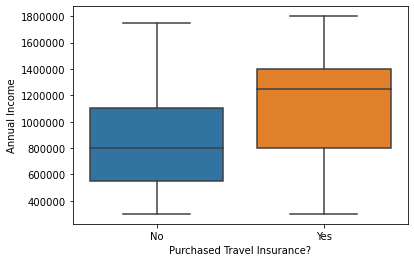

In [76]:
# create box plots of income, showing customers and non-customers separately
g = sns.boxplot(x="TravelInsurance",y="AnnualIncome", data=df_transf)

# remove scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.ylabel("Annual Income")
plt.xlabel("Purchased Travel Insurance?")
g.set_xticklabels(["No","Yes"])
plt.show()

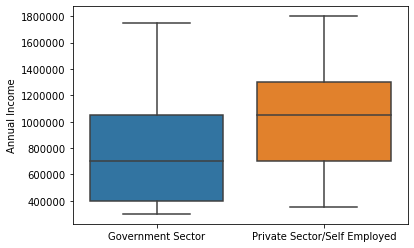

In [77]:
# create box plots of income by employment type
sns.boxplot(x="Employment Type",y="AnnualIncome", data=df)

# remove scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.xlabel("")
plt.ylabel("Annual Income")
plt.show()

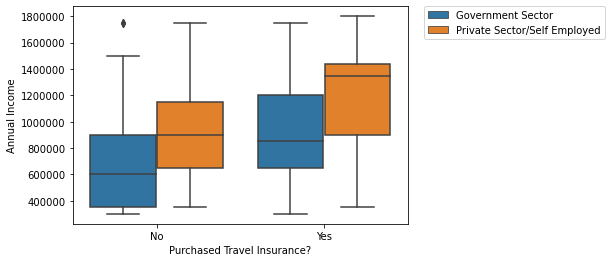

In [84]:
# create box plots of income, showing customers and non-customers separately
g=sns.boxplot(x="TravelInsurance",y="AnnualIncome", data=df, hue="Employment Type")

# remove scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.ylabel("Annual Income")
plt.xlabel("Purchased Travel Insurance?")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

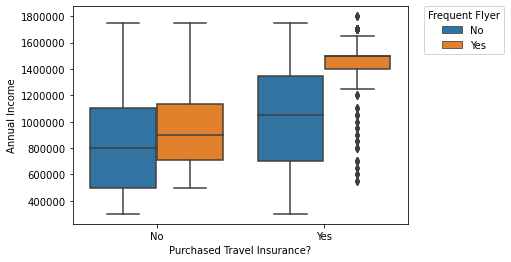

In [93]:
# create box plots of income, showing customers and non-customers separately
g=sns.boxplot(x="TravelInsurance",y="AnnualIncome", data=df, hue="FrequentFlyer")

# remove scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.ylabel("Annual Income")
plt.xlabel("Purchased Travel Insurance?")
plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0,
          title="Frequent Flyer")
plt.show()

## family sizes

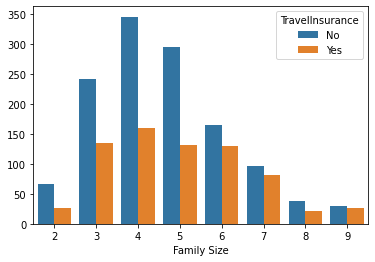

In [94]:
#count plot of family size, show customers and non-customers separately
sns.countplot(x="FamilyMembers", data=df, hue="TravelInsurance")
plt.xlabel("Family Size")
plt.ylabel("")
plt.show()

<AxesSubplot:xlabel='TravelInsurance', ylabel='FamilyMembers'>

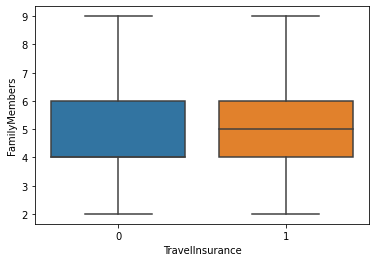

In [24]:
sns.boxplot(x="TravelInsurance", y="FamilyMembers", data=df)

In [25]:
# calculate percentages of customers and non-customers in each family size bin
ins_fam_perc = ins.FamilyMembers.value_counts(normalize=True, sort=False)*100
non_ins_fam_perc = non_ins.FamilyMembers.value_counts(normalize=True, sort=False)*100
print(ins_fam_perc, non_ins_fam_perc)

2                   3.80
3                  19.01
4                  22.54
5                  18.45
6                  18.17
7                  11.41
8                   2.96
9                   3.66
Name: FamilyMembers, dtype: float64 2                   5.17
3                  18.95
4                  27.02
5                  23.10
6                  12.92
7                   7.60
8                   2.98
9                   2.27
Name: FamilyMembers, dtype: float64


In [26]:
df.groupby("TravelInsurance").FamilyMembers.value_counts(normalize=True, sort=False)*100

TravelInsurance  FamilyMembers
0                2                               5.17
                 3                              18.95
                 4                              27.02
                 5                              23.10
                 6                              12.92
                 7                               7.60
                 8                               2.98
                 9                               2.27
1                2                               3.80
                 3                              19.01
                 4                              22.54
                 5                              18.45
                 6                              18.17
                 7                              11.41
                 8                               2.96
                 9                               3.66
Name: FamilyMembers, dtype: float64

In [27]:
ins_fam = ins.FamilyMembers
non_fam = non_ins.FamilyMembers
stats.ttest_ind(ins_fam, non_fam, alternative="greater")

Ttest_indResult(statistic=3.5716348346537448, pvalue=0.00018160400369331164)

## frequent flyers

In [28]:
# count number of frequent flyers
df.FrequentFlyer.sum()

417

In [29]:
# calculate percentage of data that frequent flyers represent
df.FrequentFlyer.mean()

0.20986411675893307

In [30]:
# 
df.groupby("Employment Type").FrequentFlyer.sum()

Employment Type
Government Sector                67
Private Sector/Self Employed    350
Name: FrequentFlyer, dtype: int64

In [31]:
df["Employment Type"].value_counts()

Private Sector/Self Employed    1417
Government Sector                570
Name: Employment Type, dtype: int64

<AxesSubplot:xlabel='TravelInsurance', ylabel='count'>

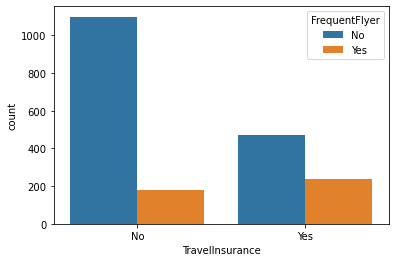

In [95]:
sns.countplot(x="TravelInsurance", hue="FrequentFlyer", data=df)

In [33]:
df.groupby("FrequentFlyer")["TravelInsurance"].mean()

FrequentFlyer
0                   0.30
1                   0.57
Name: TravelInsurance, dtype: float64

In [34]:
df.groupby("FrequentFlyer")["AnnualIncome"].mean()

FrequentFlyer
0             864,203.82
1           1,190,887.29
Name: AnnualIncome, dtype: float64

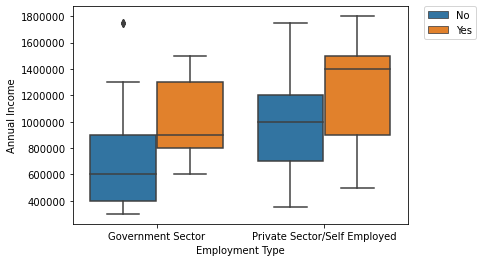

In [96]:
# create box plots of income, showing customers and non-customers separately
sns.boxplot(x="Employment Type",y="AnnualIncome", data=df, hue="FrequentFlyer")

# remove scientific notation
plt.ticklabel_format(style='plain', axis='y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.ylabel("Annual Income")
plt.show()

## Travel Abroad

In [36]:
df.EverTravelledAbroad.mean()

0.19124308002013085

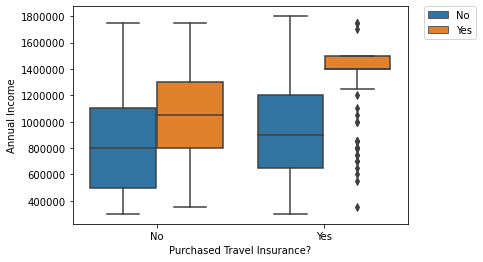

In [97]:
# create box plots of income, showing customers and non-customers separately
g=sns.boxplot(x="TravelInsurance",y="AnnualIncome", data=df, hue="EverTravelledAbroad")

# remove scientific notation
plt.ticklabel_format(style='plain', axis='y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.ylabel("Annual Income")
plt.xlabel("Purchased Travel Insurance?")
g.set_xticklabels(["No","Yes"])
plt.show()

In [38]:
df.groupby("EverTravelledAbroad")["TravelInsurance"].mean()

EverTravelledAbroad
0                   0.26
1                   0.78
Name: TravelInsurance, dtype: float64

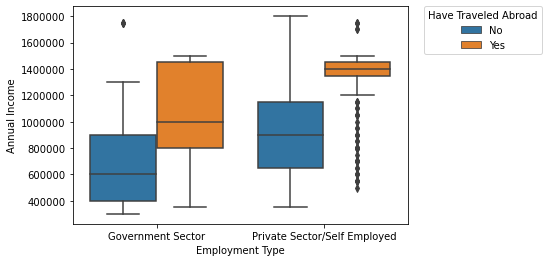

In [98]:
# create box plots of income, showing customers and non-customers separately
g= sns.boxplot(x="Employment Type",
            y="AnnualIncome",
            data=df,
            hue="EverTravelledAbroad")

# remove scientific notation
plt.ticklabel_format(style='plain', axis='y')
plt.legend(bbox_to_anchor=(1.05, 1),
         loc='upper left',
         borderaxespad=0,
        title="Have Traveled Abroad")
plt.ylabel("Annual Income")
plt.show()

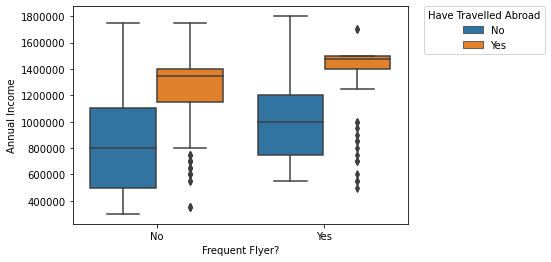

In [100]:
# create box plots of income, showing customers and non-customers separately
sns.boxplot(x="FrequentFlyer",y="AnnualIncome", data=df, hue="EverTravelledAbroad")

# remove scientific notation
plt.ticklabel_format(style='plain', axis='y')
plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0,
          title="Have Travelled Abroad")
plt.xlabel("Frequent Flyer?")
plt.ylabel("Annual Income")
plt.show()

In [41]:
df.groupby("FrequentFlyer")["Employment Type"].value_counts(normalize=True)

FrequentFlyer  Employment Type             
0              Private Sector/Self Employed                   0.68
               Government Sector                              0.32
1              Private Sector/Self Employed                   0.84
               Government Sector                              0.16
Name: Employment Type, dtype: float64

## hypothesis testing

In [101]:
# perform hypothesis test
## with h-null that customers who bought insurance and didn't buy insurance have the same income
## and h-alt that customers who bought insurance have higher incomes than those who didn't

# customer income
ins_inc = ins.AnnualIncome

# non-customer income
non_inc = non_ins.AnnualIncome

stats.ttest_ind(ins_inc, non_inc, alternative="greater")

Ttest_indResult(statistic=19.257785253687544, pvalue=3.317508880176645e-76)

In [102]:
# perform hypothesis test
## with h-null that private sector and government employees have the same income
## and h-alt that private sector employees have a higher income than non-customers

# private sector income
priv_inc = df[df["Employment Type"]=="Private Sector/Self Employed"].AnnualIncome

# public sector income
pub_inc = df[df["Employment Type"]=="Government Sector"].AnnualIncome

stats.ttest_ind(priv_inc, pub_inc, alternative="greater")

Ttest_indResult(statistic=16.60090219850942, pvalue=2.3419170641682904e-58)

In [104]:
# calculate percentages of customers with both chronic and non-chronic conditions that purpchased travel insurance
df_transf.groupby("ChronicDiseases").TravelInsurance.mean()*100

ChronicDiseases
0                  35.19
1                  37.14
Name: TravelInsurance, dtype: float64

In [105]:
chron = df_transf[df_transf.ChronicDiseases==1].TravelInsurance
non_chron = df_transf[df_transf.ChronicDiseases==0].TravelInsurance
stats.ttest_ind(chron, non_chron, alternative="greater")

Ttest_indResult(statistic=0.8105420115485078, pvalue=0.2088629466892527)

In [106]:
df_transf.groupby("GraduateOrNot").TravelInsurance.value_counts(normalize=True)

GraduateOrNot  TravelInsurance
0              0                                 0.66
               1                                 0.34
1              0                                 0.64
               1                                 0.36
Name: TravelInsurance, dtype: float64

In [107]:
df.groupby("GraduateOrNot").AnnualIncome.mean()

GraduateOrNot
No              835,254.24
Yes             949,763.59
Name: AnnualIncome, dtype: float64